 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><ul class="toc-item"><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Final_538_dataset_analysis-corrected-2.ipynb#Show-class-values-for-race" data-toc-modified-id="Show-class-values-for-race-0.0.1">Show class values for race</a></span></li><li><span><a href="http://localhost:8888/notebooks/Final_538_dataset_analysis-corrected-2.ipynb#Replace-categorical-column-with-numbers" data-toc-modified-id="Replace-categorical-column-with-numbers-0.0.2">Replace categorical column with numbers</a></span></li></ul><li><span><a href="http://localhost:8888/notebooks/Final_538_dataset_analysis-corrected-2.ipynb#Visualizing-categorical-data" data-toc-modified-id="Visualizing-categorical-data-0.1">Visualizing categorical data</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Final_538_dataset_analysis-corrected-2.ipynb#Value-counts-for-all-categorical-features" data-toc-modified-id="Value-counts-for-all-categorical-features-0.1.1">Value counts for all categorical features</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Final_538_dataset_analysis-corrected-2.ipynb#Modifying-the-dataset-to-create-binary-classification-problem" data-toc-modified-id="Modifying-the-dataset-to-create-binary-classification-problem-0.2">Modifying the dataset to create binary classification problem</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Final_538_dataset_analysis-corrected-2.ipynb#Dropping-police-column" data-toc-modified-id="Dropping-police-column-0.2.1">Dropping police column</a></span></li><li><span><a href="http://localhost:8888/notebooks/Final_538_dataset_analysis-corrected-2.ipynb#Dropping-rows-with-non-white/non-black-victims" data-toc-modified-id="Dropping-rows-with-non-white/non-black-victims-0.2.2">Dropping rows with non-white/non-black victims</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Final_538_dataset_analysis-corrected-2.ipynb#Building,-training-and-testing-the-model" data-toc-modified-id="Building,-training-and-testing-the-model-0.3">Building, training and testing the model</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Final_538_dataset_analysis-corrected-2.ipynb#Creating-training-and-testing-set" data-toc-modified-id="Creating-training-and-testing-set-0.3.1">Creating training and testing set</a></span></li><li><span><a href="http://localhost:8888/notebooks/Final_538_dataset_analysis-corrected-2.ipynb#Training-a-decision-tree" data-toc-modified-id="Training-a-decision-tree-0.3.2">Training a decision tree</a></span></li></ul></li></ul></ul></div>

Decision trees are amazing tools to easily interpret a model since they split the data based on certain thresholds for each column of the data matrix. They are easy to train with few hyper-parameter and easy to interpret. They do have a major drawback, in that they tend to over fit the data. Despite this, as a first example of a machine learning algorithm, decision trees are intuitive and can give a valuable insight about the data which can be used to build better models. The goal of this analysis is to create a model using a decision tree on a dataset. 

Introduction to the dataset <br>

I will use the sklearn algorithm to train a decision tree. As you will see, many more lines are spent preparing the data for training rather than the actual training process (which really is just one line). The data set we are going to use can be found here -https://data.world/azel/gun-deaths-in-america. This data set is part of five thirty eight's gun deaths in America project. It contains a bunch of information about victims of gun violence. Each row of the dataset contains  the year and month of the shooting, the intent of the shooter, if cops were at the scene or not, the gender, age race and education level of the victim and finally the place where the shooting happened. There is specific information about whether the victim was Hispanic or not. We take this dataset and boil it down to predicting just one of two classes- were the victims of the shooting white or black? Why ignore the other victim classes? (There are 5 in total), firstly, the rest of the classes, as you will see, make up less than 11% of the dataset, secondly the goal is to build a simple binary classification model, for those who are interested, I would love to work with people build a more multi classification model for the whole CDC multiple causes of death dataset <br>


The plan for the analysis is as follows:
- Read and display the dataset to see what the relevant columns are.
- Encode certain categorical variables so the decision tree can be run on them.
- Plot some of the categorical variables to see how skewed they are.
- Drop rows containing non-white and non-black victims. 
- Create test and train sets.
- Train the decision tree. 
- Interpret the results of the tree- I will leave that as set of the question so that the interested reader can further get involved with understanding what the model represents


In [1]:
import numpy as np 
import pandas as pd 
from io import BytesIO
import six
import scipy.stats as stats


import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing 
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import seaborn as sns 
import pydotplus
from IPython.display import Image  


In [2]:
location ='D:/datasets/fivethirtyEight-gun-violence-data.csv'

In [3]:
#load dataset
gun_violence_dataset_original= pd.read_csv(location)

# remove rows with NA 
gun_violence_dataset_original = gun_violence_dataset_original.dropna()
gun_violence_dataset_original = gun_violence_dataset_original.drop(['Unnamed: 0'], axis=1)

In [4]:
# show the first few rows of dataset 
gun_violence_dataset_original.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


### Show class values for race

In order to assess the values in the race class, we need to retrieve  the value counts for each of the class variables. This number represents the number of victims of each race, and after retrieval, It is observed that a majority of the victims were either black or white. We can convert  these numbers into percentages and plot them for visualization as well.



In [5]:
pd.value_counts(gun_violence_dataset_original['race'])

White                             65504
Black                             22922
Hispanic                           8734
Asian/Pacific Islander             1294
Native American/Native Alaskan      889
Name: race, dtype: int64

In [6]:
def val_count_to_percent(column): 
    """ Convert value counts of a dataframe column to percentages
    Input:
        column  - Nx1 array, Dataframe column
    Output: 
        percentages- Mx1 array, percentage of value counts for each variable  
    
    """
    return pd.value_counts(column)/(pd.value_counts(column).sum())*100 



From the bar plot below, it is obvious that majority of the data is for black or white victims. Here, I would like to point out that we can also make a multiclass problem by sampling the same number of rows as that of the Hispanic victims to create a 3 class classification problem. I chose to just stick with binary classification problem since this is more for demonstration purposes than hardcore analysis of the dataset. 

Personally, I believe that the complete version of this dataset requires proper analysis so that we can spot some trends on what kind of gun deaths or crimes are prevalent. Based on this if we can build a good prediction model,it can hopefully help law enforcement understand the nature of the problem better. This really is the whole point of the data driven approach. But I digress.



In [7]:
val_count_to_percent(gun_violence_dataset_original['race'])

White                             65.937207
Black                             23.073594
Hispanic                           8.791762
Asian/Pacific Islander             1.302558
Native American/Native Alaskan     0.894879
Name: race, dtype: float64

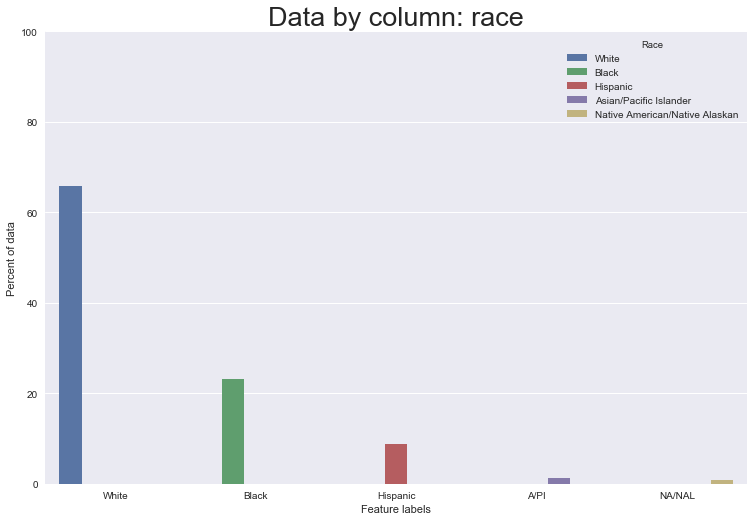

In [8]:

column  = gun_violence_dataset_original['race']
fig_width = 18 
fig_height = 15
save_fig = True
figname = 'race'

height = np.array(val_count_to_percent(column).values)

# sns.plt.figure(figsize=(fig_width,fig_height))
hue = list(val_count_to_percent(column).index)
mod_hue =[hue[0],hue[1],hue[2],'A/PI', 'NA/NAL'  ]
all_data = {'Feature labels':mod_hue , 'Percent of data': height, 'Race': hue}
df = pd.DataFrame(data = all_data)

ax = sns.factorplot(x ='Feature labels', y='Percent of data',hue= 'Race', kind = 'bar', data =df, legend_out = False, size= 7, aspect = 1.5)
sns.set(font_scale=2.2)
ax.set(ylim= (0,100))
sns.plt.title('Data by column: '+column.name , fontsize= 27)
if (save_fig==True): 
      plt.savefig(figname +'.png', format='png')




### Replace categorical column with numbers 

We need to convert categorical variables to labels. Generally, one can do this manually by writing a ‘for’ loop that goes over the 'sex' column and assigns, let’s say 0 for men and 1 for women. But sklearn gives us a handy little function called the LabelEncoder: you give it a list of columns, run 'fit_transform' over the column and it converts categorical data to labeled data.

In [9]:

gun_violence_dataset = gun_violence_dataset_original.copy()


In [10]:
columns_to_encode =  ['intent','sex','place']
le = preprocessing.LabelEncoder()

for i  in range(len(columns_to_encode)): 
    column =columns_to_encode[i]
    gun_violence_dataset[column] = le.fit_transform(gun_violence_dataset[column])
    

In [11]:
gun_violence_dataset.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,2,0,1,34.0,Asian/Pacific Islander,100,1,4.0
1,2012,1,2,0,0,21.0,White,100,8,3.0
2,2012,1,2,0,1,60.0,White,100,3,4.0
3,2012,2,2,0,1,64.0,White,100,1,4.0
4,2012,2,2,0,1,31.0,White,100,3,2.0


## Visualizing categorical data 
### Value counts for all categorical features


I ended up visualizing most of the categorical columns in the dataset since there really aren’t too many columns. I guess one can put them in a subplot, but I wanted the x and y axis to be legible. 

Suicide         63.579719
Homicide        33.973204
Accidental       1.635747
Undetermined     0.811330
Name: intent, dtype: float64


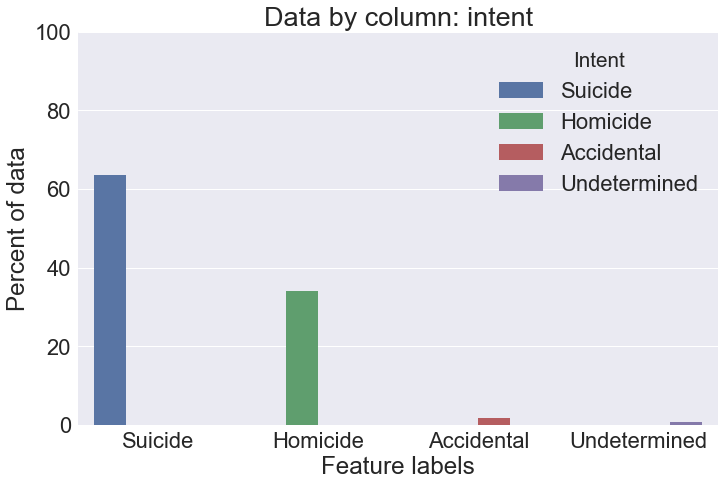

In [12]:
print(val_count_to_percent(gun_violence_dataset_original['intent']))

column  = gun_violence_dataset_original['intent']
fig_width = 18 
fig_height = 10
save_fig = True
figname = 'intent'

height = np.array(val_count_to_percent(column).values)

# sns.plt.figure(figsize=(fig_width,fig_height))
hue = list(val_count_to_percent(column).index)
# mod_hue =[hue[0],hue[1],hue[2],'A/PI', 'NA/NAL'  ]
all_data = {'Feature labels':hue , 'Percent of data': height, 'Intent': hue}
df = pd.DataFrame(data = all_data)

ax = sns.factorplot(x ='Feature labels', y='Percent of data',hue= 'Intent', kind = 'bar', data =df, legend_out = False, size= 7, aspect = 1.5)
sns.set(font_scale=2.2)
ax.set(ylim= (0,100))
sns.plt.title('Data by column: '+column.name , fontsize= 27)
if (save_fig==True): 
      plt.savefig(figname +'.png', format='png')


0    99.980874
1     0.019126
Name: police, dtype: float64


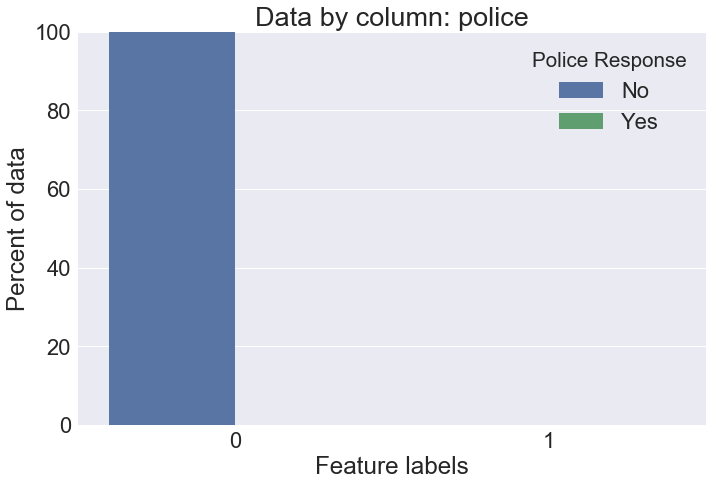

In [13]:
print(val_count_to_percent(gun_violence_dataset_original['police']))

column  = gun_violence_dataset_original['police']
fig_width = 18 
fig_height = 10
save_fig = True
figname = 'police'

height = np.array(val_count_to_percent(column).values)

# sns.plt.figure(figsize=(fig_width,fig_height))
hue = list(val_count_to_percent(column).index)
mod_hue=['No','Yes']
all_data = {'Feature labels':hue , 'Percent of data': height, 'Police Response': mod_hue}
df = pd.DataFrame(data = all_data)

ax = sns.factorplot(x ='Feature labels', y='Percent of data',hue= 'Police Response', kind = 'bar', data =df, legend_out = False, size= 7, aspect = 1.5)
sns.set(font_scale=2.2)
ax.set(ylim= (0,100))
sns.plt.title('Data by column: '+column.name , fontsize= 27)
if (save_fig==True): 
      plt.savefig(figname +'.png', format='png')


M    85.541004
F    14.458996
Name: sex, dtype: float64


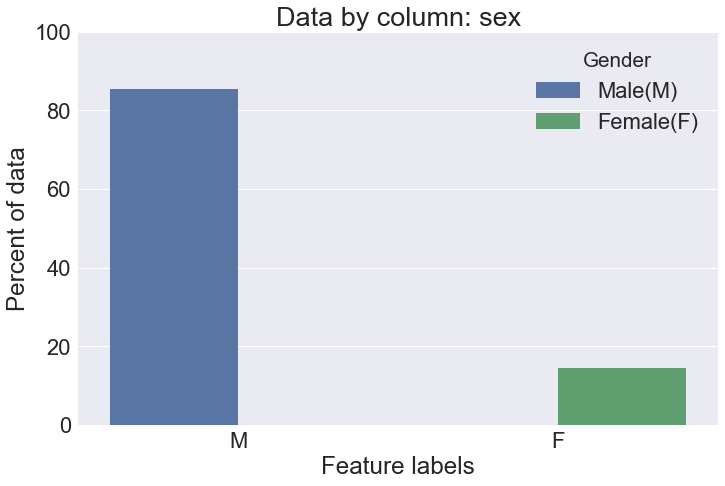

In [14]:
print(val_count_to_percent(gun_violence_dataset_original['sex']))

column  = gun_violence_dataset_original['sex']
fig_width = 18 
fig_height = 10
save_fig = True
figname = 'Gender'

height = np.array(val_count_to_percent(column).values)

# sns.plt.figure(figsize=(fig_width,fig_height))
hue = list(val_count_to_percent(column).index)
mod_hue=['Male(M)','Female(F)']
all_data = {'Feature labels':hue , 'Percent of data': height, 'Gender': mod_hue}
df = pd.DataFrame(data = all_data)

ax = sns.factorplot(x ='Feature labels', y='Percent of data',hue= 'Gender', kind = 'bar', data =df, legend_out = False, size= 7, aspect = 1.5)
sns.set(font_scale=2.2)
ax.set(ylim= (0,100))
sns.plt.title('Data by column: sex' , fontsize= 27)
if (save_fig==True): 
      plt.savefig(figname +'.png', format='png')


2.0    42.537471
1.0    21.589845
3.0    21.571726
4.0    12.964175
5.0     1.336783
Name: education, dtype: float64


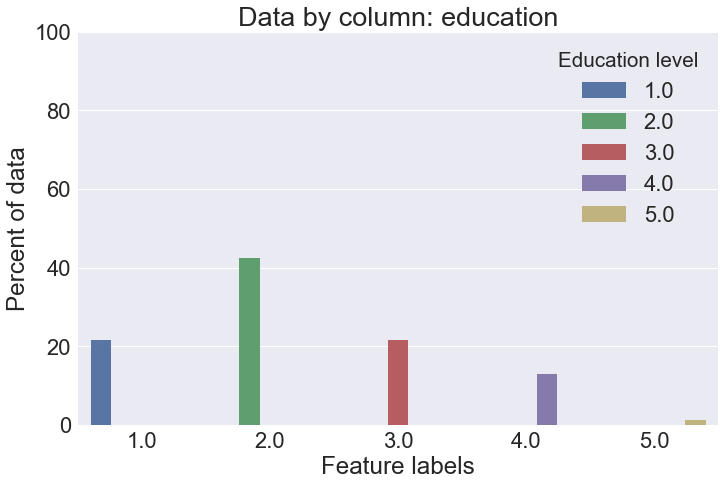

In [15]:
print(val_count_to_percent(gun_violence_dataset_original['education']))
column  = gun_violence_dataset_original['education']
fig_width = 18 
fig_height = 10
save_fig = True
figname = 'education'

height = np.array(val_count_to_percent(column).values)

# sns.plt.figure(figsize=(fig_width,fig_height))
hue = list(val_count_to_percent(column).index)
mod_hue=hue
all_data = {'Feature labels':hue , 'Percent of data': height, 'Education level': mod_hue}
df = pd.DataFrame(data = all_data)

ax = sns.factorplot(x ='Feature labels', y='Percent of data',hue= 'Education level', kind = 'bar', data =df, legend_out = False, size= 7, aspect = 1.5)
sns.set(font_scale=2.2)
ax.set(ylim= (0,100))
sns.plt.title('Data by column: '+column.name , fontsize= 27)
if (save_fig==True): 
      plt.savefig(figname +'.png', format='png')


Home                       60.842737
Other specified            13.829862
Street                     11.221727
Other unspecified           8.915575
Trade/service area          3.461744
School/instiution           0.674431
Farm                        0.471095
Industrial/construction     0.249640
Residential institution     0.204343
Sports                      0.128847
Name: place, dtype: float64


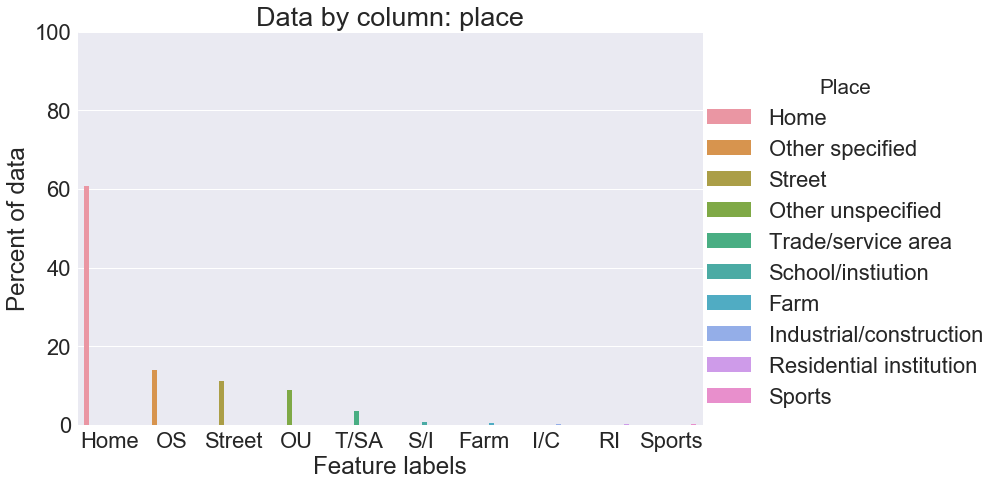

In [16]:
print(val_count_to_percent(gun_violence_dataset_original['place']))

column  = gun_violence_dataset_original['place']
fig_width = 18 
fig_height = 10
save_fig = True
figname = 'place'

height = np.array(val_count_to_percent(column).values)

# sns.plt.figure(figsize=(fig_width,fig_height))
hue = list(val_count_to_percent(column).index)
mod_hue=['Home', 'OS','Street', 'OU', 'T/SA', 'S/I', 'Farm', 'I/C', 'RI', 'Sports']
all_data = {'Feature labels':mod_hue , 'Percent of data': height, 'Place': hue}
df = pd.DataFrame(data = all_data)

ax = sns.factorplot(x ='Feature labels', y='Percent of data',hue= 'Place', kind = 'bar', data =df, legend_out = True, size= 7, aspect = 1.5)
sns.set(font_scale=2.2)
ax.set(ylim= (0,100))
sns.plt.title('Data by column: '+column.name , fontsize= 27)
if (save_fig==True): 
      plt.savefig(figname +'.png', format='png')


7     8.905509
8     8.700160
5     8.594466
6     8.588426
9     8.453540
4     8.383077
12    8.359925
10    8.350865
3     8.221012
1     8.206919
11    8.183767
2     7.052334
Name: month, dtype: float64


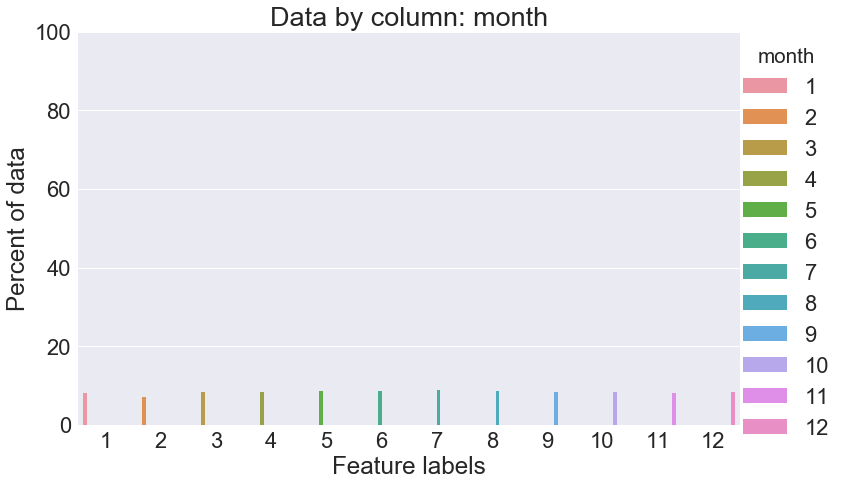

In [17]:
print(val_count_to_percent(gun_violence_dataset_original['month']))
column  = gun_violence_dataset_original['month']
fig_width = 18 
fig_height = 10
save_fig = True
figname = 'month'

height = np.array(val_count_to_percent(column).values)

# sns.plt.figure(figsize=(fig_width,fig_height))
hue = list(val_count_to_percent(column).index)
mod_hue=hue
all_data = {'Feature labels':hue , 'Percent of data': height, 'month': mod_hue}
df = pd.DataFrame(data = all_data)

ax = sns.factorplot(x ='Feature labels', y='Percent of data',hue= 'month', kind = 'bar', data =df, legend_out = True, size= 7, aspect = 1.5)
sns.set(font_scale=2.2)
ax.set(ylim= (0,100))
sns.plt.title('Data by column: '+column.name , fontsize= 27)
if (save_fig==True): 
      plt.savefig(figname +'.png', format='png')


2013    33.365209
2014    33.344071
2012    33.290720
Name: year, dtype: float64


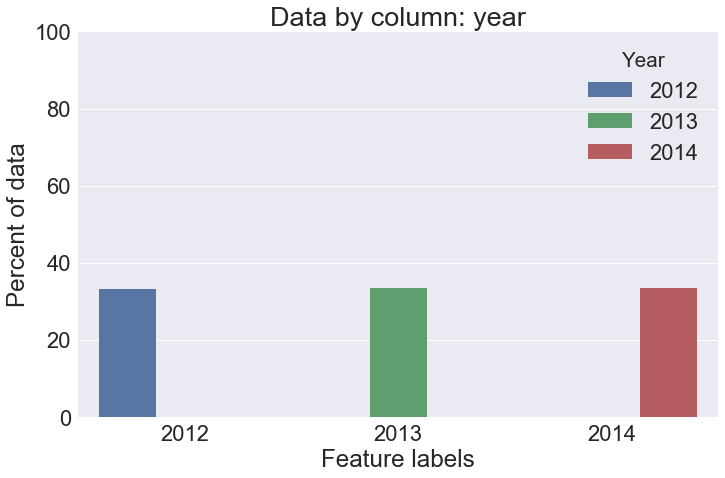

In [18]:
print(val_count_to_percent(gun_violence_dataset_original['year']))

column  = gun_violence_dataset_original['year']
fig_width = 18 
fig_height = 10
save_fig = True
figname = 'year'

height = np.array(val_count_to_percent(column).values)

# sns.plt.figure(figsize=(fig_width,fig_height))
hue = list(val_count_to_percent(column).index)
mod_hue=hue
all_data = {'Feature labels':hue , 'Percent of data': height, 'Year': mod_hue}
df = pd.DataFrame(data = all_data)

ax = sns.factorplot(x ='Feature labels', y='Percent of data',hue= 'Year', kind = 'bar', data =df, legend_out = False, size= 7, aspect = 1.5)
sns.set(font_scale=2.2)
ax.set(ylim= (0,100))
sns.plt.title('Data by column: '+column.name , fontsize= 27)
if (save_fig==True): 
      plt.savefig(figname +'.png', format='png')


From the above we can basically drop the police column since it will not contribute to any classification. One can keep it as well, I do not expect it to make much of a difference, but since it is really insignificant to the current analysis, its just better to leave it out. There are other columns which are also fairly skewed like 'sex' but we shall keep them. Just by looking at some of these charts one can reach certain conclusions, for example
-	Most victims are males 
-	Most gun deaths occur at home, about 10% occur on the streets, and these could be either lone wolf or gang based shooters.
-  Number of shootings tends to be fairly uniform across the year
-  There are fewer victims with higher education levels.For example, level 4 and 5 together make up for less than 15% of all the victims, while education levels 1 and 2 account for over 60% of all the victims.  However, we need more data to understand  the reasons behind this.


## Modifying the dataset to create binary classification problem
### Dropping police column 


In [19]:
# dropping the police column
gun_violence_dataset = gun_violence_dataset.drop(['police'], axis=1)

gun_violence_dataset_org_moded =gun_violence_dataset_original.copy()
gun_violence_dataset_org_moded = gun_violence_dataset_org_moded.drop(['police'], axis=1)

# no police column 
gun_violence_dataset_org_moded.head()

,year,month,intent,sex,age,race,hispanic,place,education
0,2012,1,Suicide,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012,1,Suicide,F,21.0,White,100,Street,3.0
2,2012,1,Suicide,M,60.0,White,100,Other specified,4.0
3,2012,2,Suicide,M,64.0,White,100,Home,4.0
4,2012,2,Suicide,M,31.0,White,100,Other specified,2.0


### Dropping rows with non-white/non-black victims

In [20]:
drop_rows = np.where((gun_violence_dataset['race']=='Hispanic') | (gun_violence_dataset['race']=='Asian/Pacific Islander')
                                    |(gun_violence_dataset['race']=='Asian/Pacific Islander') 
         | (gun_violence_dataset['race']=='Native American/Native Alaskan') )



In [21]:
gun_violence_dataset.drop(gun_violence_dataset.index[list(drop_rows[0])], inplace=True)
gun_violence_dataset_org_moded.drop(gun_violence_dataset_org_moded.index[list(drop_rows[0])], inplace=True)



In [22]:
# we also drop the hispanic column since we have removed the rows with hispanic 
# victims
if 'hispanic' in gun_violence_dataset.columns:
    gun_violence_dataset = gun_violence_dataset.drop(['hispanic'], axis=1)
    gun_violence_dataset_org_moded = gun_violence_dataset_org_moded.drop(['hispanic'], axis=1)

In [23]:
# so we have elimated all other class values other than white and black
np.unique(gun_violence_dataset['race'])


array(['Black', 'White'], dtype=object)

In [24]:
# must not forget to label encode the race category as well
gun_violence_dataset['race'] = le.fit_transform(gun_violence_dataset['race'])
gun_violence_dataset.head()


,year,month,intent,sex,age,race,place,education
1,2012,1,2,0,21.0,1,8,3.0
2,2012,1,2,1,60.0,1,3,4.0
3,2012,2,2,1,64.0,1,1,4.0
4,2012,2,2,1,31.0,1,3,2.0
6,2012,2,3,1,48.0,1,1,2.0


### Check for independence 

In [25]:
def get_range(column):
    return range(int(column.min()), int(column.max()) + 1)


def chi_square_test( single_column_a, single_column_b):
    # list comprehension 
    matrix = [
               [sum((single_column_a == val1) & (single_column_b == val2))
               for val2 in get_range(single_column_b)]
               for val1 in get_range(single_column_a)
             ]
   
  
    return matrix, stats.chi2_contingency(matrix)


We need to check if each of our columns are independent from the target column. I will do this for categorical variables first. To check that two categorical variables are independent or not we need to conduct a chi square test. Above I have written two functions for this. Now  So let us run the functions and see what happens

In [26]:
matrix, chi_result_sr= chi_square_test(gun_violence_dataset.sex, gun_violence_dataset.race)
observed_counts = pd.DataFrame(matrix,columns=['Black','White'], index=['Female','Male'])
observed_counts

,Black,White
Female,2294,10641
Male,20628,54863


In [27]:
chi_result_sr

(528.4135974175284,
 6.252882642186619e-117,
 1,
 array([[ 3353.04175243,  9581.95824757],
        [19568.95824757, 55922.04175243]]))

In [28]:
# to get the critical value from the chi square distribution 
chi_critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = chi_result_sr[2])   # Df = number of variable categories - 1
chi_critical_value

3.8414588206941236

The chi square test for the columns gender and race is 528.4 with a p-value of 0.0  and degree of freedom is 1. The degree of freedom(DOF) is decided by (nrows-1)(ncolumns-1) where nrows is the number of rows and ncolumns is the number of columns. Since we have a 2 by 2 matrix for the chi square test we will get DOF as 1. Say for example a 3 by 4 matrix we will get DOF as 6. Why do we care about the DOF anyways? Well in order to determine the critical value for a chi square distribution we need the DOF and using this critical value we can then say that if - <br>

$\chi^2$ value > chi_critical value 

we reject the null hypothesis. The null hypotheis is that these two variables are independent, hence we are rejecting this. Below we do this for all the categorical variables and show that in all cases that race does dependent on each of the variables. Had we found that it does not dependent on a certain variable then we could have removed it since it will not have any bearings in determining which race the victim belongs to


In [29]:
matrix, chi_result_ir= chi_square_test(gun_violence_dataset.intent, gun_violence_dataset.race)
chi_critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = chi_result_ir[2])   # Df = number of variable categories - 1

chi_result_ir[0],chi_critical_value

(39747.25189546883, 7.8147279032511765)

In [30]:
matrix, chi_result_pr= chi_square_test(gun_violence_dataset.place, gun_violence_dataset.race)
chi_critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = chi_result_pr[2])   # Df = number of variable categories - 1

chi_result_pr[0],chi_critical_value

(12184.386905754522, 16.918977604620448)

In [31]:
matrix, chi_result_er= chi_square_test(gun_violence_dataset.education, gun_violence_dataset.race)
chi_critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = chi_result_er[2])   # Df = number of variable categories - 1

chi_result_er[0],chi_critical_value

(5460.990530542735, 9.487729036781154)

## Building, training and testing the model 
### Creating training and testing set 
I can ofcourse manually create these by using iloc or just numpy but I will use the sklearn.model_selection 

In [32]:
# fixed the random state to ensure that I get the same split each time
train_X, test_X = model_selection.train_test_split(gun_violence_dataset,test_size=0.3,random_state= 1)

In [33]:
train_y = train_X['race']
train_X = train_X.drop(['race'], axis=1)

test_y = test_X['race']
test_X = test_X.drop(['race'], axis=1)


### Training a decision tree 
This is where I use the ‘train the decision tree’ classifier. As you can see, its oh so conveniently a one liner. The real work was above, where we had  to get the training set and the test set, and once we have those, we can throw any kind of classifier we want, at it. We make predictions using the predict function of the model. The accuracy is fairly easy to calculate: we can equate y_preds to test_y and sum it up, recall and precision are also fairly easy to calculate. I will refer you to the wiki article on recall and precision to know what they are-https://en.wikipedia.org/wiki/Precision_and_recall. They have done a pretty nice job of explaining it. We get an accuracy of about 87 percent. Which is not too shabby since it is a single decision tree. One thing I did notice was that it is better to have a shallow tree, (in my case its 8 units deep) vs something that is deep, since deeper trees would mean that there is a greater chance of overfitting the data. 

In [34]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth = 8,
                                  min_samples_leaf = 100)

clf = clf.fit(train_X, train_y)
y_preds = clf.predict(test_X)


In [35]:
# calculate the accuracy 
print('accuracy: ', accuracy_score(test_y,y_preds))


accuracy:  0.8783926417370326


Since we are essentially dealing with a binary classification, we can use recall and precision scores as well. As we see we get fairly high values

In [36]:

print('recall: ', recall_score(test_y,y_preds))   
print('precision: ', precision_score(test_y,y_preds))


recall:  0.9243042104190029
precision:  0.9123981080809097


Visualize the decision tree 

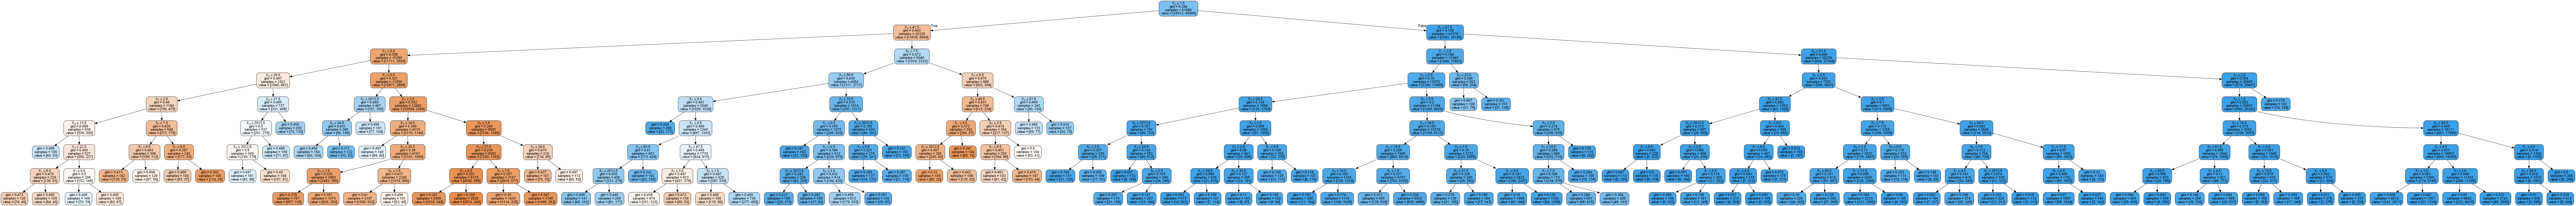

In [37]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
img_object = Image(graph.write_png('decisiontree.png'))
Image(graph.create_png())

So now we have a decision tree based model that can use to predict based on a few parameters whether the victim of a gun death will either be a black person or a white person? What next. We can use the tree to figure out what are some of the important features responsible for deciding whether the victim will black or white. 'feature_importances' gives us an array that scores each of the features, the array sums to 1. Using this we can decide which are the relevant features we should worry about when deciding the race of the victim. Lets also extract the column names of the test or the training dataset so we can plot a bar plot with feature_importance

In [38]:
#extracting important features 
important_features = clf.feature_importances_

#column names 
column_names = train_X.columns

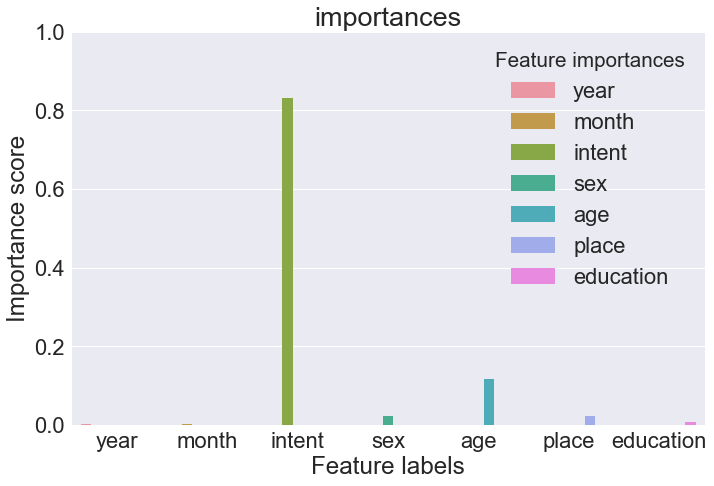

In [39]:

column  = gun_violence_dataset_original['police']
fig_width = 18 
fig_height = 10
save_fig = True
figname = 'importances'


# sns.plt.figure(figsize=(fig_width,fig_height))
hue = column_names
mod_hue=hue
all_data = {'Feature labels':hue, 'Importance score': important_features, 'Feature importances': mod_hue}
df = pd.DataFrame(data = all_data)

ax = sns.factorplot(x ='Feature labels', y='Importance score',hue= 'Feature importances', kind = 'bar', data =df, legend_out = False, size= 7, aspect = 1.5)
sns.set(font_scale=2.2)
ax.set(ylim= (0,1))
sns.plt.title(figname , fontsize= 27)
if (save_fig==True): 
      plt.savefig(figname +'.png', format='png')


This is interesting that for black and white victim, the deciding factor seems to be the intent, and the other three factors being age, gender and place. The education levels surprisingly  seem to have very little effect on deciding the race of the victim. there are ways that one can extend the analysis further by studying on what class values in the intent column are relevant to race of victims. For example, the five thirty eight has articles on how suicides are prevalent among middle aged men https://fivethirtyeight.com/features/suicide-in-wyoming/ and homicides are prevalent amongst black men https://fivethirtyeight.com/features/homicide-in-new-orleans/. The latter is a well documented phenomenon, the prevalence of gang violence, drug related killings and aggression driven gun deaths have caused homicide rates in cities like New Orleans and Baltimore to be very high


For technical information - 

Gini criterion - Elements of Statistical Learning 

Decision tree classifer - http://scikit-learn.org/stable/modules/tree.html
                            The scikit learn documentation is actually pretty decent 
                            
CDC deaths due to multiple causes - https://www.cdc.gov/nchs/data_access/VitalStatsOnline.htm#Mortality_Multiple                            
                            
                            